In [1]:
# Install stable versions
!pip install ipython-sql==0.4.1 prettytable==0.7.2 SQLAlchemy==1.4.46

from google.colab import files
import pandas as pd
import sqlite3


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta 0:00:00
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13695 sha256=dba2761598394d8311395696e22fed4bba110c514c2c9cdedada890b16e6c12b
  Stored in directory: /root/.cache/pip/wheels/ca/f9/66/1ebeb8cdff2211eebb6fce02957f9e0a9ae3da4b7e65512d1b
  Created wheel for SQLAlchemy: filename=SQLAlchemy-1.4.46-cp312-cp312-linux_x86_64.whl size=1610896 sha256=1b61b9c40d123f2b0d084db1f9ada258e0dab8d30c0a1c738857343ef413065f
  Stored in directory: /root/.cache/pip/wheels/02/a2/82/ea179f8d421288f49b068fc735deb487f017b91a35651fc0d0
Successfully built prettytable SQLAlchemy
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.16.0
    Uninstalling prettytable-3.16.0:
      Successfully uninstalled prettytable-3.16.

In [2]:
# Upload file
uploaded = files.upload()

# Load CSV into DataFrame
df = pd.read_csv("SuperstoreSalesData.csv", encoding="ISO-8859-1")
print("✅ Data Loaded. First 5 rows:")
print(df.head())

# Create SQLite DB and save table
conn = sqlite3.connect("retail.db")
df.to_sql("retail_sales", conn, if_exists="replace", index=False)

# Load SQL extension and connect
%load_ext sql
%sql sqlite:///retail.db


Saving SuperstoreSalesData.csv to SuperstoreSalesData.csv
✅ Data Loaded. First 5 rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Pos

In [3]:
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [4]:
%sql sqlite:///retail.db


In [5]:
%%sql
SELECT * FROM retail_sales LIMIT 5;


 * sqlite:///retail.db
Done.


Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,219.582
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0.0,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [6]:
print("shape",df.shape)

shape (9994, 21)


In [7]:
print("columns",df.columns)

columns Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [8]:
print(df.head(5))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [9]:


# Quick null check
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
%%sql
-- Count rows
SELECT COUNT(*) AS total_rows FROM retail_sales;



 * sqlite:///retail.db
Done.


total_rows
9994


In [11]:
%%sql
SELECT * FROM retail_sales LIMIT 5;



 * sqlite:///retail.db
Done.


Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,219.582
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0.0,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [12]:
%%sql
SELECT COUNT(DISTINCT "Customer ID") AS unique_customers
FROM retail_sales;

 * sqlite:///retail.db
Done.


unique_customers
793


In [13]:
print("Duplicates:", df.duplicated().sum())
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)

Duplicates: 0
Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Data Types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [14]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [15]:
print(df['Order Date'].dtypes)
print(df['Ship Date'].dtypes)


datetime64[ns]
datetime64[ns]


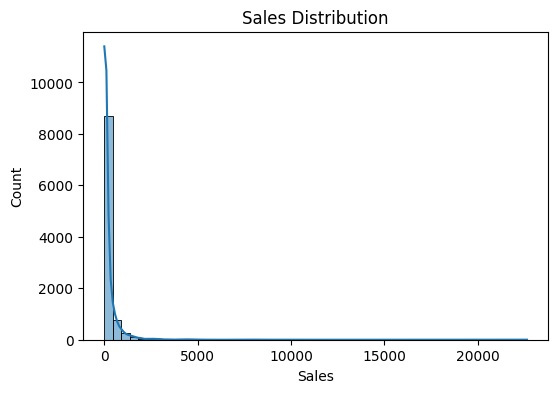

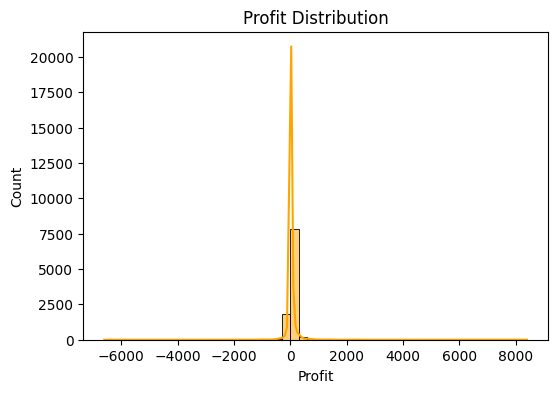

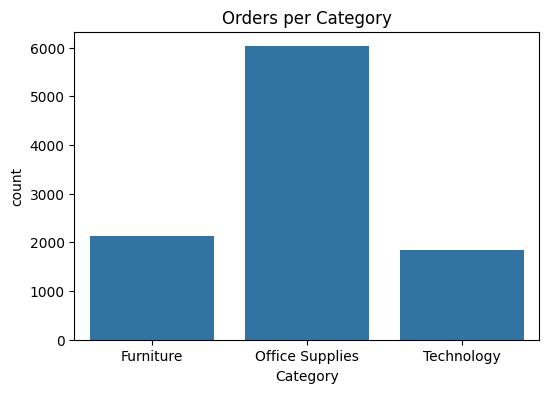

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

# Profit distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Profit'], bins=50, kde=True, color="orange")
plt.title("Profit Distribution")
plt.show()

# Category counts
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title("Orders per Category")
plt.show()


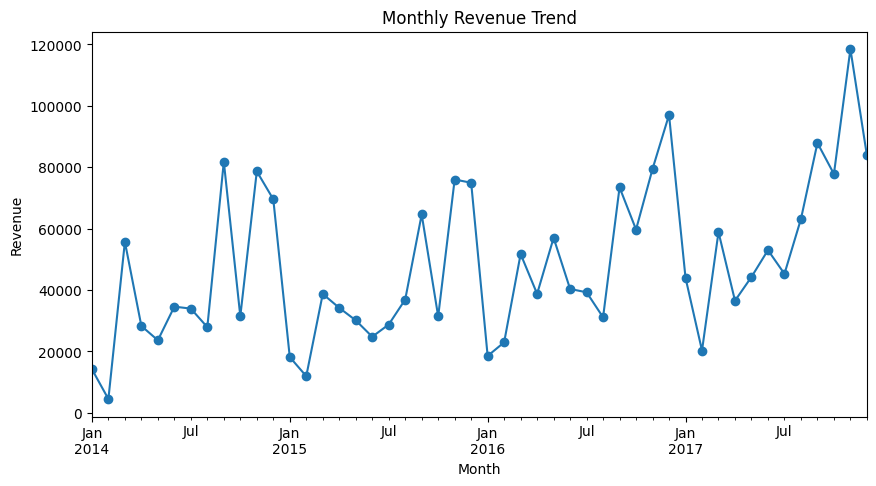

In [17]:
# Group by month
monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()

monthly_sales.plot(figsize=(10,5), marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()


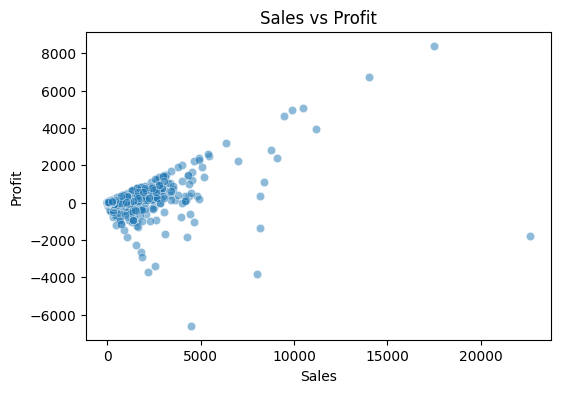

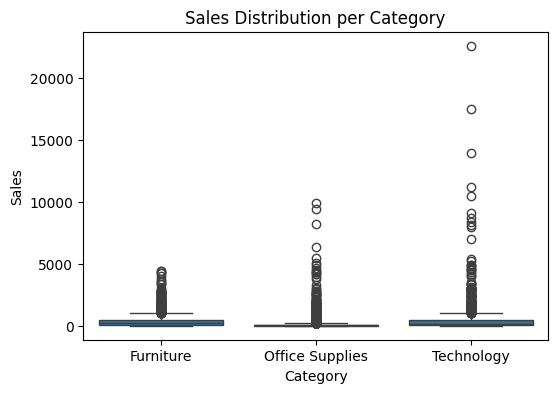

In [18]:
# Sales vs Profit scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
plt.title("Sales vs Profit")
plt.show()

# Quantity vs Sales
plt.figure(figsize=(6,4))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title("Sales Distribution per Category")
plt.show()


              Sales       Profit
count   9994.000000  9994.000000
mean     229.858001    28.656896
std      623.245101   234.260108
min        0.444000 -6599.978000
25%       17.280000     1.728750
50%       54.490000     8.666500
75%      209.940000    29.364000
max    22638.480000  8399.976000


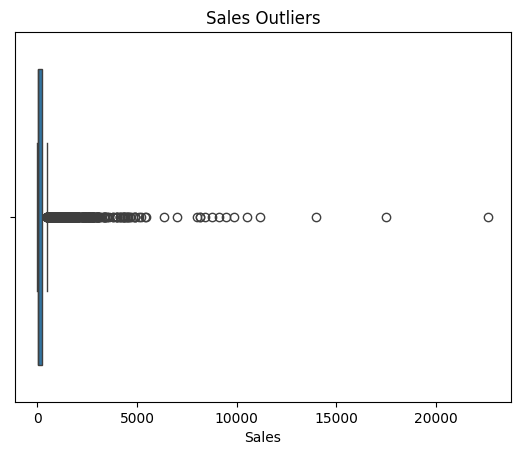

In [19]:
print(df[['Sales','Profit']].describe())

# Quick outlier visualization
sns.boxplot(x=df['Sales'])
plt.title("Sales Outliers")
plt.show()


In [20]:
%%sql
SELECT COUNT(*) AS total_rows ,  COUNT(DISTINCT "Customer ID") AS total_customers FROM retail_sales;


 * sqlite:///retail.db
Done.


total_rows,total_customers
9994,793


In [21]:
#4. Monthly Revenue Trend
%%sql
SELECT SUM(Sales) AS total_revenue
FROM retail_sales;


 * sqlite:///retail.db
Done.


total_revenue
2297200.860299955


In [22]:
%%sql
SELECT strftime('%Y-%m', "Order Date") AS month,
       SUM(Sales) AS monthly_revenue
FROM retail_sales
GROUP BY month
ORDER BY month;


 * sqlite:///retail.db
Done.


month,monthly_revenue
None,2297200.860299955


In [23]:
#5. Top 10 Products by Revenue
%%sql
SELECT "Product Name",
       SUM(Sales) AS total_sales
FROM retail_sales
GROUP BY "Product Name"
ORDER BY total_sales DESC
LIMIT 10;


 * sqlite:///retail.db
Done.


Product Name,total_sales
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479000000003
GBC Ibimaster 500 Manual ProClick Binding System,19024.5
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068
High Speed Automatic Electric Letter Opener,17030.311999999998


In [24]:
#6. Repeat vs One-time Customers
%%sql
SELECT
    CASE WHEN order_count > 1 THEN 'Repeat' ELSE 'One-time' END AS customer_type,
    COUNT(*) AS num_customers
FROM (
    SELECT "Customer ID", COUNT(DISTINCT "Order ID") AS order_count
    FROM retail_sales
    GROUP BY "Customer ID"
)
GROUP BY customer_type;


 * sqlite:///retail.db
Done.


customer_type,num_customers
One-time,12
Repeat,781


In [26]:
#7. Avg. Basket Size (items per order)
%%sql
SELECT AVG(item_count) AS avg_basket_size
FROM (
    SELECT "Order ID", SUM(Quantity) AS item_count
    FROM retail_sales
    GROUP BY "Order ID"
);


 * sqlite:///retail.db
Done.


avg_basket_size
7.560990217608305


In [27]:
len(df)


9994

In [28]:
df['Customer ID'].nunique()



793

In [29]:
df['Sales'].sum() #Total Revenue


np.float64(2297200.8603000003)

In [30]:
monthly_revenue = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()
monthly_revenue #Monthly Revenue Trend


,Sales
Order Date,
2014-01,14236.8950
2014-02,4519.8920
2014-03,55691.0090
2014-04,28295.3450
2014-05,23648.2870
2014-06,34595.1276
2014-07,33946.3930
2014-08,27909.4685
2014-09,81777.3508


In [31]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products
# 10 top Products

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [32]:
orders_per_customer = df.groupby('Customer ID')['Order ID'].nunique()
repeat_summary = orders_per_customer.apply(lambda x: 'Repeat' if x > 1 else 'One-time').value_counts()
repeat_summary #6. Repeat vs One-time Customers


,count
Order ID,
Repeat,781
One-time,12


In [33]:
#7. Avg. Basket Size (items per order)
basket_size = df.groupby('Order ID')['Quantity'].sum().mean()
basket_size


np.float64(7.560990217608305)

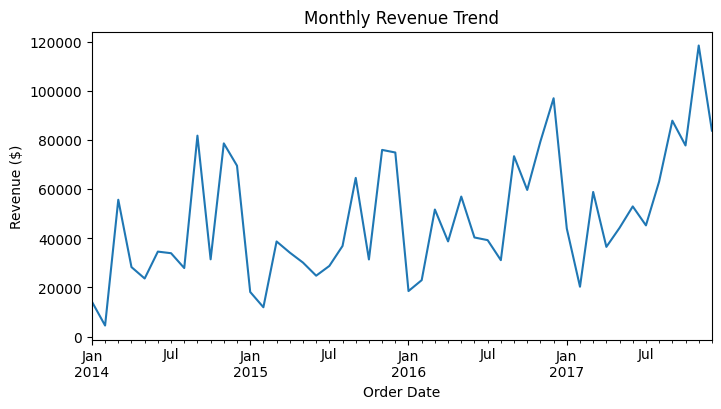

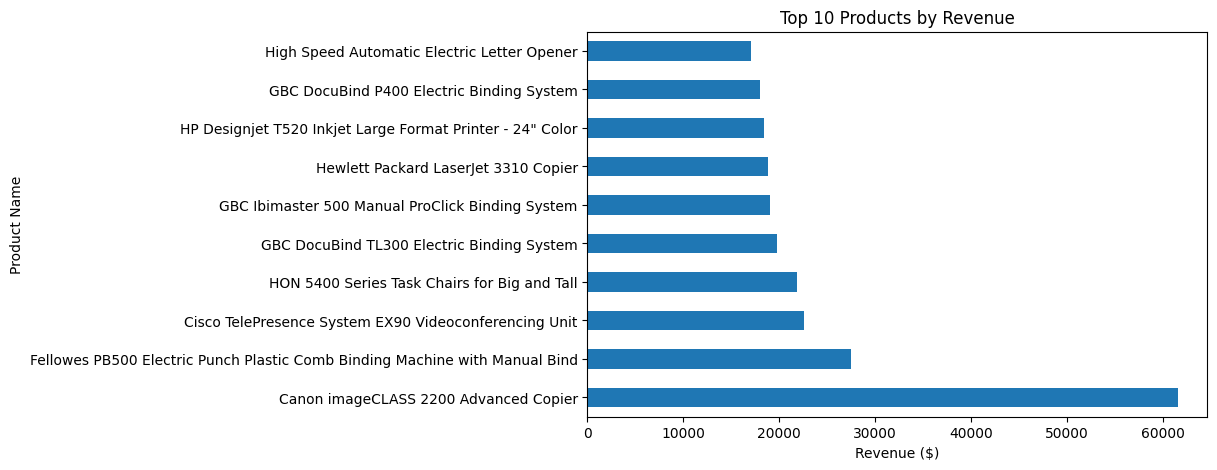

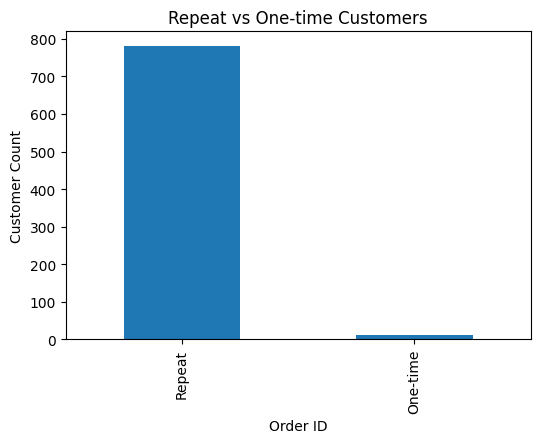

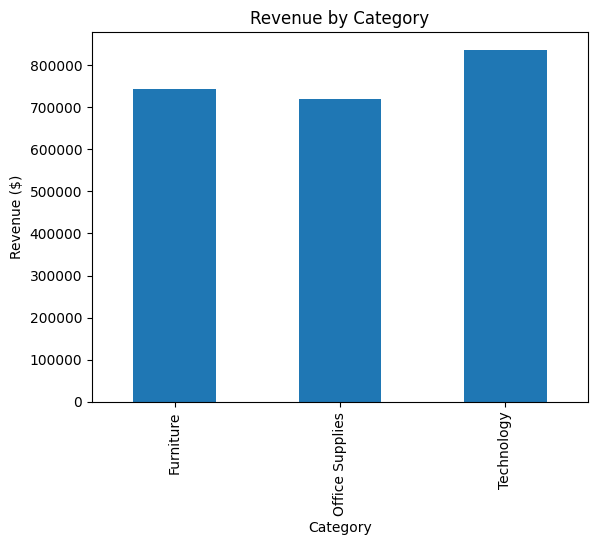

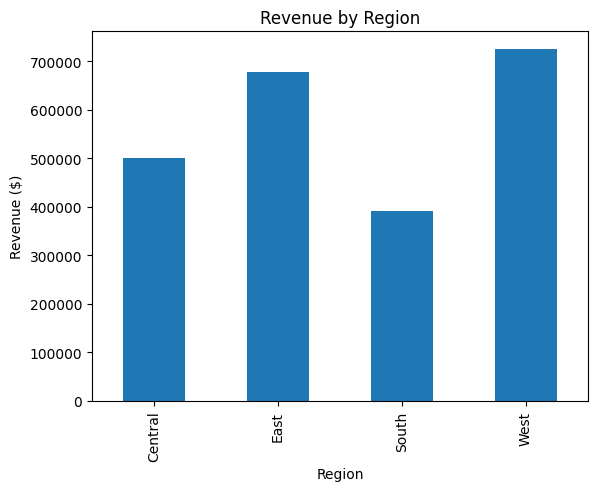

In [34]:
import matplotlib.pyplot as plt

# 1. Monthly Revenue Trend
monthly_revenue.plot(kind='line', figsize=(8,4), title="Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.show()

# 2. Top 10 Products by Revenue
top_products.plot(kind='barh', figsize=(8,5), title="Top 10 Products by Revenue")
plt.xlabel("Revenue ($)")
plt.show()

# 3. Repeat vs One-time Customers
repeat_summary.plot(kind='bar', figsize=(6,4), title="Repeat vs One-time Customers")
plt.ylabel("Customer Count")
plt.show()

# 4. Category-wise Revenue
category_rev = df.groupby('Category')['Sales'].sum()
category_rev.plot(kind='bar', title="Revenue by Category")
plt.ylabel("Revenue ($)")
plt.show()

# 5. Region-wise Revenue
region_rev = df.groupby('Region')['Sales'].sum()
region_rev.plot(kind='bar', title="Revenue by Region")
plt.ylabel("Revenue ($)")
plt.show()
